In [2]:
import qiskit
from qiskit import QuantumCircuit
from qiskit import execute, IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [3]:
qiskit.__version__

'0.16.1'

In [4]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.1',
 'qiskit-aer': '0.7.2',
 'qiskit-ignis': '0.5.1',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.1',
 'qiskit': '0.23.2'}

In [5]:
# Create a Quantum Circuit
qc = QuantumCircuit(2, 2)

In [6]:
# Add a H gate on qubit 0, putting this qubit in superposition.
qc.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
qc.cx(0, 1)
# Add a Measure gate to see the state.
qc.measure([0, 1], [0, 1])

In [7]:
# Draw the circuit
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [8]:
# See a list of available local simulators
print("BasicAer backends: ", BasicAer.backends())
backend_sim = BasicAer.get_backend('qasm_simulator')

BasicAer backends:  [<QasmSimulatorPy('qasm_simulator') from BasicAer()>, <StatevectorSimulatorPy('statevector_simulator') from BasicAer()>, <UnitarySimulatorPy('unitary_simulator') from BasicAer()>]


In [9]:
# Compile and run the Quantum circuit on a simulator backend
job_sim = execute(qc, backend_sim)
result_sim = job_sim.result()

In [10]:
# Show the results
counts = result_sim.get_counts(qc)
print(counts)

{'00': 536, '11': 488}


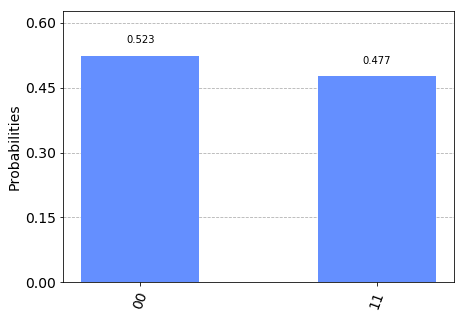

In [11]:
plot_histogram(counts)

In [12]:
print(qc.qasm(formatted = True))

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
cx q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];

None


In [13]:
from qiskit import IBMQ
IBMQ.save_account('7040fe2beb2b7c7af54a6e0812959fded2661e2359f701d40dfa11dd0cf5208d7e9f8b095708b6fc49f1d489d8dedf295f4fb642e08de7b27037cc3e63e2f48d')

In [14]:
# Authenticate for access to remote backends
try:
    provider = IBMQ.load_account()
except:
    print("""WARNING: No valid IBMQ credentials found on disk.
             You must store your credentials using IBMQ.save_account(token, url).
             For now, there's only access to local simulator backends...""")
    exit(0)

/Applications/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [15]:
# see a list of available remote backends
ibmq_backends = provider.backends()

In [16]:
print("Remote backends: ", ibmq_backends)
# Compile and run the Quantum Program on a real device backend
# select those with at least 2 qubits
try:
    least_busy_device = least_busy(provider.backends(
        filters=lambda x: x.configuration().n_qubits >= 2, simulator=False))
except:
    print("All devices are currently unavailable.")

print("Running on current least busy device: ", least_busy_device)

Remote backends:  [<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]
Running on current least busy device:  ibmq_ourense


In [17]:
#running the job
job_exp = execute(qc, least_busy_device, shots=1024, max_credits=10)
result_exp = job_exp.result()

In [18]:
# Show the results
counts = result_exp.get_counts(qc)
print(counts)
# print('Counts: ', result_exp.get_counts(qc))

{'00': 518, '01': 29, '10': 28, '11': 449}


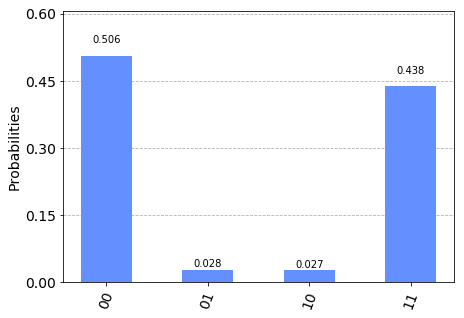

In [19]:
plot_histogram(counts)